In [136]:
from os import listdir
from os.path import isfile, join

mypath = "D:/Brain Tumor/dataset"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(file_names))
# img = imread('D:/Brain Tumor/dataset/N (1).jpeg')
# resized_img = resize(img, (128,128))
# fd, hog_image = hog(img_arr, orientations=9, pixels_per_cell=(8, 8),
# cells_per_block=(2, 2), visualize=True, multichannel=True)
# print(fd.shape)

253


In [137]:
#reading the image
#img = imread('D:/Brain Tumor/yes/Y2.jpg')
#resize image
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import numpy as np
feature_vector = []
labels = []
min_shape = []
for i,file in enumerate(file_names):
        img = imread(mypath+"/"+file,0)
        resized_img = resize(img, (128,64))
        img_arr = np.array(resized_img)
        #generating HOG features
        fd, hog_image = hog(img_arr, orientations=9, pixels_per_cell=(8, 8),
        cells_per_block=(2, 2), visualize=True, multichannel=None)
        if file[0] == 'Y':
            labels.append(1)
        else:
            labels.append(0)
        feature_vector.append(fd)
        min_shape.append(fd.shape)
print(len(feature_vector))
print(min(min_shape))

253
(3780,)


In [138]:
feature_vector = np.array(feature_vector)
feature_vector.shape
labels = np.array(labels)
labels.shape

(253,)

In [139]:
import pandas as pd

#panda dataframe 
df=pd.DataFrame(data=feature_vector)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']

X

,0,1,2,3,4,5,6,7,8,9,...,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779
84,0.340992,0.084240,0.081927,0.000000,0.202377,0.000000,0.000000,0.033752,0.060292,0.340992,...,0.000000,0.247454,0.000000,0.050003,0.000000,0.000000,0.000000,0.000000,0.000000,0.019035
141,0.172373,0.111612,0.346842,0.000000,0.346842,0.135414,0.057774,0.106843,0.346842,0.000886,...,0.000000,0.384034,0.062080,0.000000,0.048770,0.408806,0.000000,0.000000,0.000000,0.000000
100,0.417632,0.038726,0.023788,0.000000,0.038784,0.000000,0.000000,0.000000,0.000000,0.164287,...,0.005011,0.005317,0.005027,0.000000,0.003519,0.013430,0.000000,0.000000,0.000000,0.000000
59,0.130435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.247232,...,0.000000,0.285228,0.000000,0.029407,0.000000,0.033348,0.000000,0.000000,0.000000,0.000000
190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.019581,0.000673,0.005891,0.055117,0.241005,0.013492,0.000000,0.000000,0.013565,0.000000,...,0.001631,0.014461,0.014226,0.008266,0.007571,0.033685,0.004969,0.010655,0.019898,0.007883
101,0.485344,0.009809,0.000000,0.230176,0.485344,0.000000,0.000000,0.003280,0.000000,0.000000,...,0.000000,0.463947,0.000000,0.000000,0.213179,0.463947,0.000000,0.007003,0.002793,0.000000
153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
107,0.353355,0.193112,0.062465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309186,...,0.000000,0.444760,0.000000,0.000000,0.097625,0.072716,0.000000,0.000000,0.000000,0.000000


In [140]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [141]:
svm_linear=svm.SVC(kernel='linear',gamma=0.001,C=10)

In [142]:
svm_linear.fit(X_train,y_train)
yhat = svm_linear.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('\tAccuracy: %.3f' % acc)
print(confusion_matrix(y_test, yhat))
print("\n\n")

	Accuracy: 0.844
[[17  7]
 [ 3 37]]





In [143]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='liblinear')

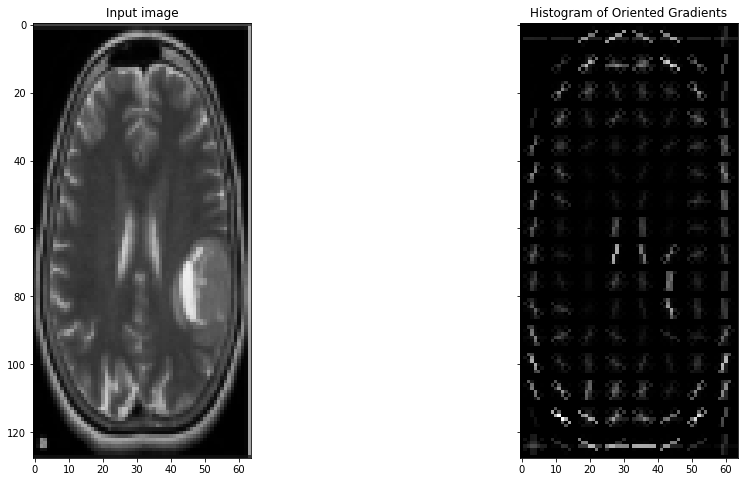

In [144]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [145]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_class = RandomForestClassifier(n_estimators=100)
svm_rbf=svm.SVC(kernel='rbf',gamma=0.001,C=10)
svm_linear=svm.SVC(kernel='linear',gamma=0.001,C=10)
log = LogisticRegression(solver='liblinear')

model_names={"Random Forest":rf_class,"SVM RBF":svm_rbf,"SVM_linear":svm_linear,"logistic regression":log}

In [146]:
def testing(model_name,X_train, X_test, y_train, y_test):
    model=model_names[model_name]
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)
    # evaluate predictions
    acc = accuracy_score(y_test, yhat)
    print(model_name,'\tAccuracy: %.3f' % acc)
    print(confusion_matrix(y_test, yhat))
    print("\n\n")

In [147]:
def result(dataset):
    
    
    #panda dataframe 
    df=pd.DataFrame(data=dataset)
    df['label']=labels
    df=df.sample(frac=1)
    X=df.drop(['label'], axis = 1)
    y=df['label']
    
    
    #Different model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    for model in ["Random Forest","SVM RBF","SVM_linear","logistic regression"]:
        testing(model,X_train, X_test, y_train, y_test)

In [148]:
result(feature_vector)

Random Forest 	Accuracy: 0.859
[[23  5]
 [ 4 32]]



SVM RBF 	Accuracy: 0.859
[[22  6]
 [ 3 33]]



SVM_linear 	Accuracy: 0.859
[[24  4]
 [ 5 31]]



logistic regression 	Accuracy: 0.859
[[23  5]
 [ 4 32]]





In [149]:
# import pickle
# filename = 'log_model.sav'
# log = LogisticRegression(solver='liblinear')
# while(True):
#     df=pd.DataFrame(data=feature_vector)
#     df['label']=labels
#     df=df.sample(frac=1)
#     X=df.drop(['label'], axis = 1)
#     y=df['label']
#     #Different model
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#     log.fit(X_train,y_train)
#     yhat = log.predict(X_test)
#     # evaluate predictions
#     acc = accuracy_score(y_test, yhat)
#     print(acc*100)
#     if(acc>0.95):
#         pickle.dump(log, open(filename, 'wb'))
#         break